In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv(r"C:\Users\SIDDHARTH\OneDrive\Documents\Job profiles\Code_notes\Deep Learning\Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Feature extraction and scaling 

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Surname'].value_counts()

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

In [7]:
df['Surname'].nunique()

2932

In [8]:
df.drop(columns= ['Surname','RowNumber','CustomerId'], inplace= True)

In [9]:
df = pd.get_dummies(df,columns=['Geography','Gender'], drop_first= True, dtype= int)

In [10]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [11]:
df['CreditScore'].min()

350

In [12]:
df['CreditScore'].max()

850

In [13]:
import matplotlib.pyplot as plt


In [14]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [15]:
x = df.drop(columns= ['Exited'])
y = df['Exited']

from sklearn.model_selection  import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [17]:
x_train_scaled

array([[ 0.51288809,  0.10130224, -0.34601909, ...,  1.71038507,
        -0.57273139, -1.0952694 ],
       [-0.26485337,  0.38736574,  1.03460571, ..., -0.58466366,
        -0.57273139,  0.91301738],
       [-0.00560622,  0.76878375,  1.37976191, ..., -0.58466366,
        -0.57273139, -1.0952694 ],
       ...,
       [ 0.36770968, -0.47082477, -0.69117529, ..., -0.58466366,
        -0.57273139, -1.0952694 ],
       [ 0.5025182 , -0.66153377, -0.34601909, ..., -0.58466366,
        -0.57273139, -1.0952694 ],
       [ 0.52325797, -1.51972428, -0.69117529, ..., -0.58466366,
        -0.57273139,  0.91301738]])

## Training the model


In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [60]:
model = Sequential()

model.add(Dense(11,activation= 'relu', input_dim = 11))
model.add(Dense(11,activation= 'relu'))
model.add(Dense(3,activation= 'relu'))
model.add(Dense(1,activation='sigmoid'))

In [61]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 304 (1.19 KB)

 Trainable params: 304 (1.19 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.compile(loss = 'binary_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [63]:
history = model.fit(x_train_scaled,y_train,epochs= 40, validation_split= 0.2)

Epoch 1/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7461 - loss: 0.6218 - val_accuracy: 0.7962 - val_loss: 0.4793
Epoch 2/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.7982 - loss: 0.4620 - val_accuracy: 0.7962 - val_loss: 0.4359
Epoch 3/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.7788 - loss: 0.4385 - val_accuracy: 0.7981 - val_loss: 0.4171
Epoch 4/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - accuracy: 0.7990 - loss: 0.4123 - val_accuracy: 0.8037 - val_loss: 0.4020
Epoch 5/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 0.8003 - loss: 0.4095 - val_accuracy: 0.8181 - val_loss: 0.3853
Epoch 6/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 0.8382 - loss: 0.3790 - val_accuracy: 0.8506 - val_loss: 0.3631
Epoch 7/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.8477 - loss: 0.3781 - val_accuracy: 0.8525 - val_loss: 0.3530
Epoch 8/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.8515 - loss: 0.3617 - va

In [64]:
y_predicted = model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step


## Finding Threshold for prediction

In [65]:
from sklearn.metrics import roc_curve


In [66]:
fpr, tpr , thresholds = roc_curve(y_test, y_predicted)


In [67]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.21890547e-04,
       6.21890547e-04, 1.86567164e-03, 1.86567164e-03, 2.48756219e-03,
       2.48756219e-03, 3.10945274e-03, 3.10945274e-03, 3.73134328e-03,
       3.73134328e-03, 4.35323383e-03, 4.35323383e-03, 4.97512438e-03,
       4.97512438e-03, 5.59701493e-03, 5.59701493e-03, 6.21890547e-03,
       6.21890547e-03, 6.84079602e-03, 6.84079602e-03, 7.46268657e-03,
       7.46268657e-03, 8.08457711e-03, 8.08457711e-03, 1.11940299e-02,
       1.11940299e-02, 1.18159204e-02, 1.18159204e-02, 1.24378109e-02,
       1.24378109e-02, 1.30597015e-02, 1.30597015e-02, 1.43034826e-02,
       1.43034826e-02, 1.49253731e-02, 1.49253731e-02, 1.61691542e-02,
       1.61691542e-02, 1.74129353e-02, 1.74129353e-02, 1.80348259e-02,
       1.80348259e-02, 1.92786070e-02, 1.92786070e-02, 1.99004975e-02,
       1.99004975e-02, 2.05223881e-02, 2.05223881e-02, 2.30099502e-02,
       2.30099502e-02, 2.36318408e-02, 2.36318408e-02, 2.42537313e-02,
      

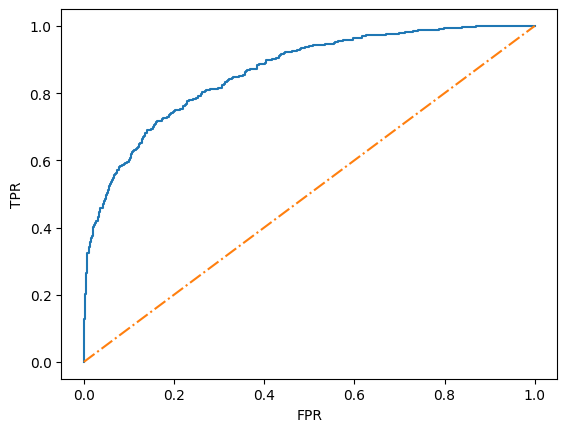

In [68]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '-.')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [69]:
j_statistic = tpr - fpr
optimal_idx = np.argmax(j_statistic)
optimal_threshold = thresholds[optimal_idx]

In [70]:
optimal_threshold

0.22150649

In [71]:
y_result = np.where(y_predicted > optimal_threshold, 1, 0)

In [72]:
y_predicted

array([[0.0540824 ],
       [0.00367718],
       [0.628654  ],
       ...,
       [0.15852906],
       [0.10513786],
       [0.36386997]], dtype=float32)

## Finding accuracy for the model


In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_result)

0.8135

In [74]:
from sklearn.metrics import recall_score
recall_score(y_test,y_result)

0.7142857142857143

In [75]:
from sklearn.metrics import f1_score
f1_score(y_test,y_result)

0.6002143622722401

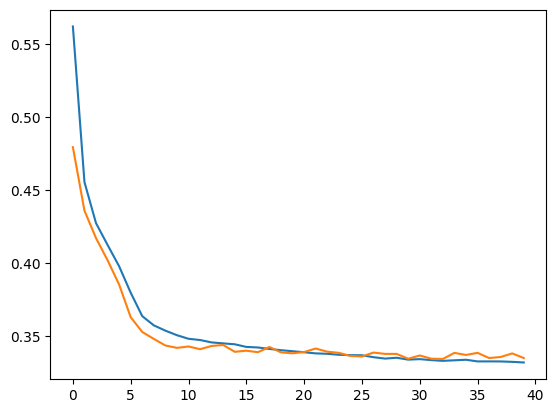

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

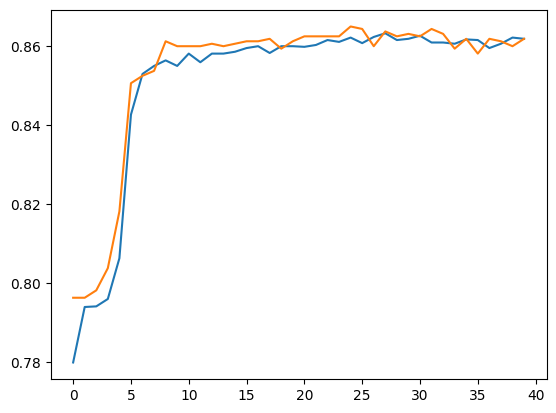

In [77]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])